# Impact of Synaptic Strength on single EI population 

We want to find out what impact synaptic coupling strength has on the networks behavior.

Synchronization, strength of PING rhythm, frequency, amplitude.

We are especially interested in E -> E, and E -> I connections.

As a base model we will use a model that produces oscillations in the gamma band.
For this we need to increase the mean of the noise process until frequency jumps to ~ 30Hz.

The hardest part will be to analyze the dynamics and interplay between multiple parameters as we have 4 different connections.
This is very complex and simulations will take a lot of time. Visualization of 4 different variables is not trivial as well.

In [4]:
%load_ext autoreload
%autoreload 2

import experiments
import plots
import constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
experiment = experiments.CouplingStrengthExperiment()
experiment.run()


Starting simulation of 5 parameter configurations ...
1 of 5 Running parameter configuration: 0.1
building synapses...
build synapses time: 0.7337939739227295s
------------------ running network!
runtime: 16.1
2 of 5 Running parameter configuration: 0.2
building synapses...
build synapses time: 0.6617271900177002s
------------------ running network!
runtime: 15.7
3 of 5 Running parameter configuration: 0.30000000000000004
building synapses...
build synapses time: 0.44568300247192383s
------------------ running network!
runtime: 15.7
4 of 5 Running parameter configuration: 0.4
building synapses...
build synapses time: 0.4300971031188965s
------------------ running network!
runtime: 15.1
5 of 5 Running parameter configuration: 0.5
building synapses...
build synapses time: 0.3857090473175049s
------------------ running network!
runtime: 14.5
Finished simulation.


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
INFO       Overwriting environment variable "DYLD_LIBRARY_PATH" [brian2.devices.cpp_standalone.device.overwritten_env_var]


In [2]:
models = experiments.CouplingStrengthExperiment.load()
len(models)

5

Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...


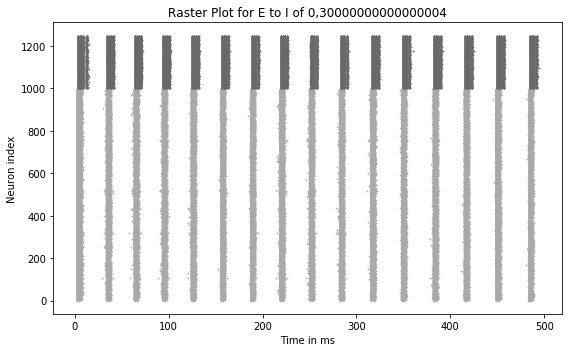

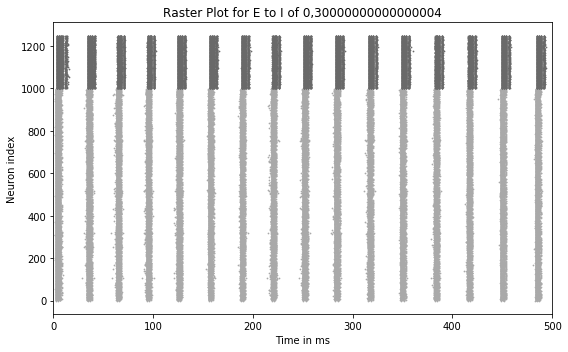

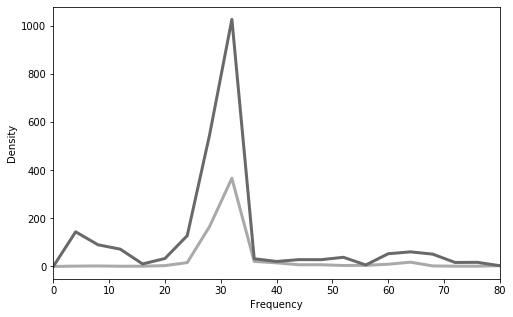

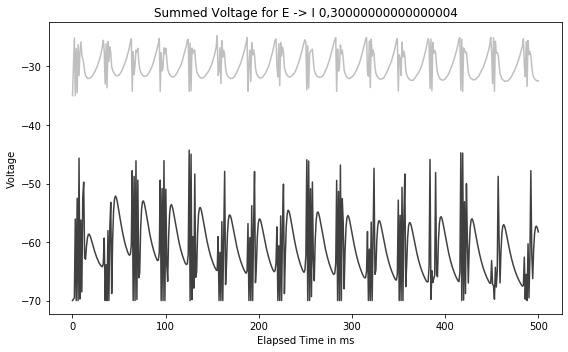

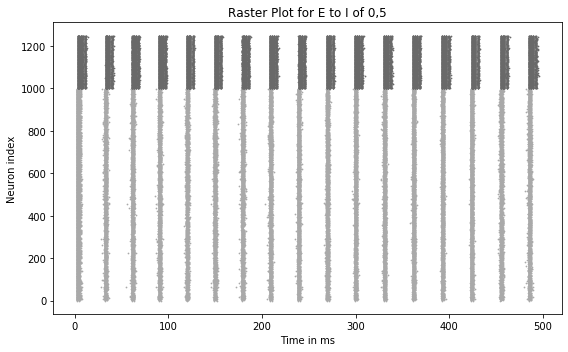

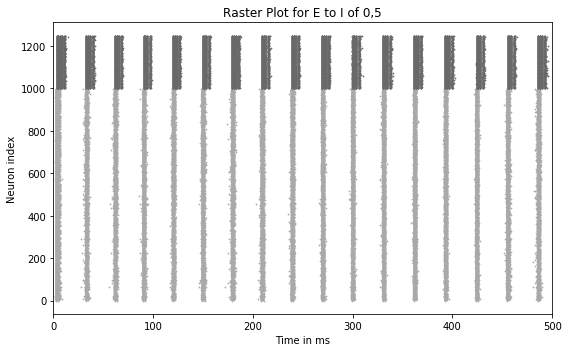

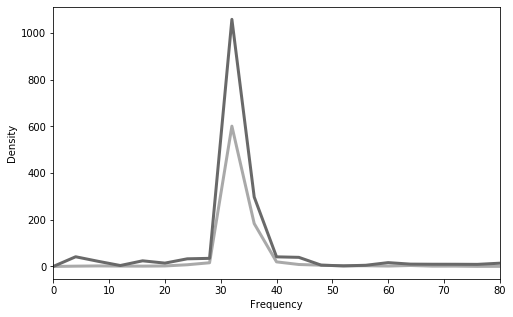

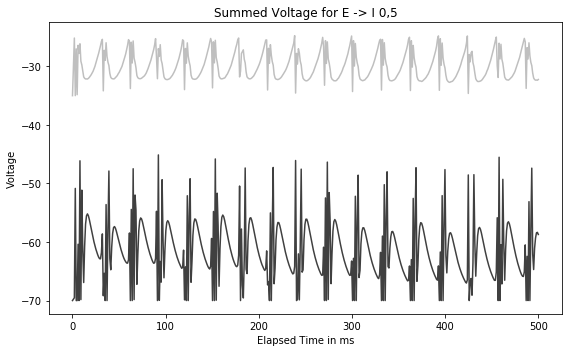

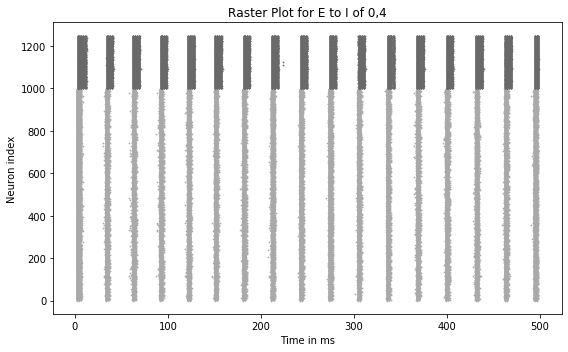

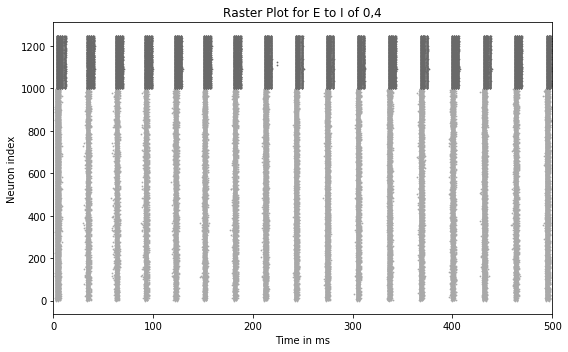

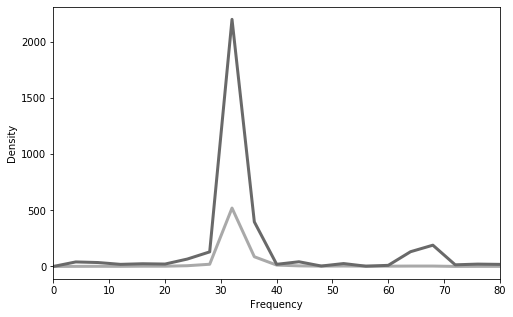

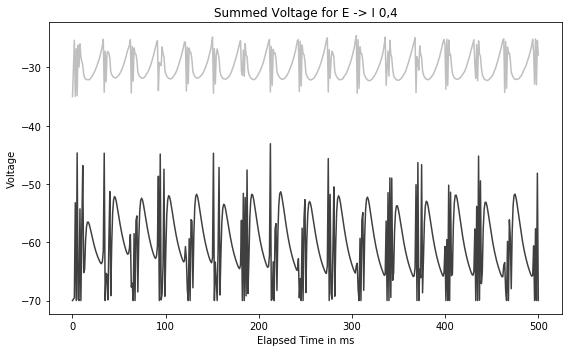

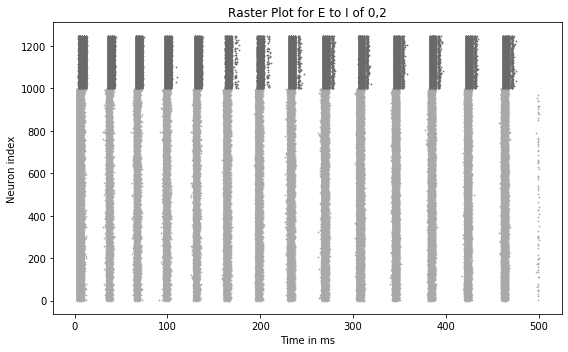

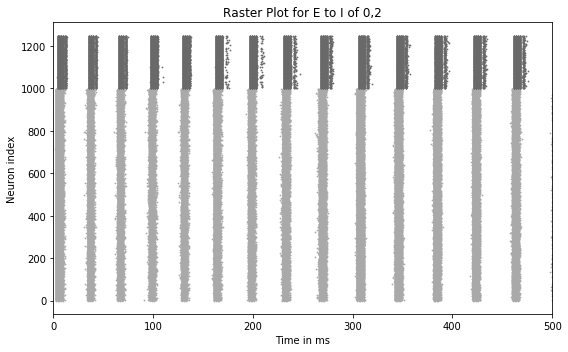

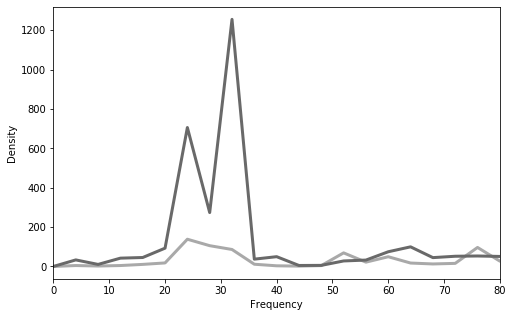

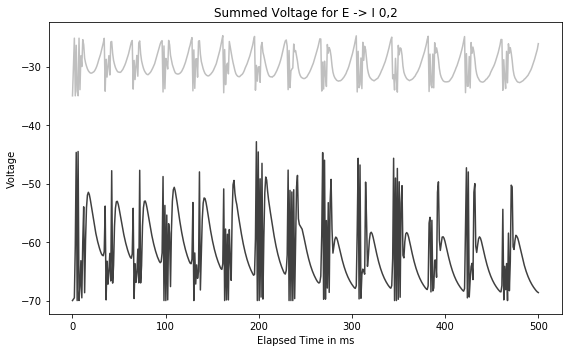

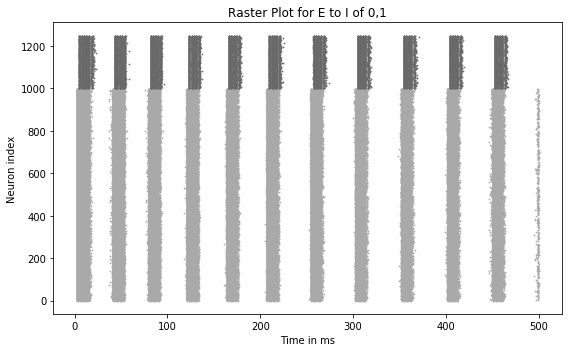

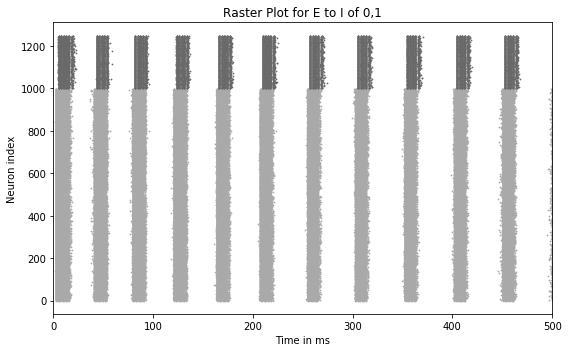

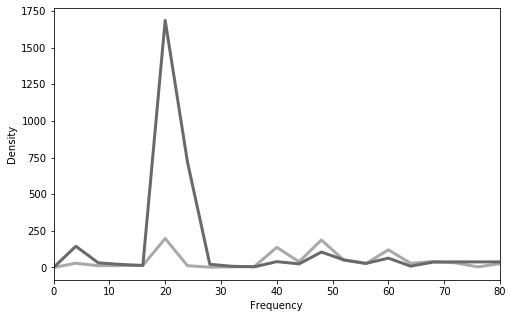

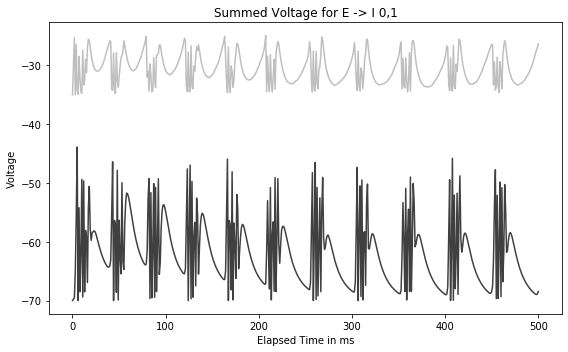

In [5]:
for model in models:    
    etoi_ = str(model["params"]["J_etoi"]).replace('.', ',')
    etoe = str(model["params"]["J_etoe"]).replace('.', ',')
    
    fig, ax = plots.raster(model, f"Raster Plot for E to I of {etoi_}")
    fig.savefig(f"{constants.PLOTS_PATH}/synaptic_strength/raster_{etoi_}")
    
    fig, ax = plots.raster(model, f"Raster Plot for E to I of {etoi_}", x_left=0, x_right=500)
    fig.savefig(f"{constants.PLOTS_PATH}/synaptic_strength/raster_detail_{etoi_}")
    
    fig, ax = plots.psd(title="", model=model)
    fig.savefig(f"{constants.PLOTS_PATH}/synaptic_strength/psd_{etoi_}")
    
    fig, ax = plots.summed_voltage(title=f"Summed Voltage for E -> I {etoi_}", model=model)
    fig.savefig(f"{constants.PLOTS_PATH}/synaptic_strength/summed_voltage_{etoi_}")


First results indicate that we can achieve spike time variability and desynchronization by changing E to I synaptic weights.

Next step should be to weaken the E -> E synapses so that they do not fire always at the same time. This should help in desynchronizing the inhibitory neurons as well.